In [ ]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout , BatchNormalization
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop, Adam
from pylab import rcParams
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report , accuracy_score
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/train.csv")
test = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/test.csv")

print(df.shape, test.shape)
print('Data Directory : ', os.listdir("/content/drive/MyDrive/UCI HAR Dataset/"))
print(df.Activity.value_counts())
df.T

(7352, 564) (2947, 564)
Data Directory :  ['.DS_Store', 'features_info.txt', 'features.txt', 'README.txt', 'activity_labels.txt', 'train', 'test', 'train.csv', 'test.csv', 'HARANN-master']
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: Activity, dtype: int64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7312,7313,7314,7315,7316,7317,7318,7319,7320,7321,7322,7323,7324,7325,7326,7327,7328,7329,7330,7331,7332,7333,7334,7335,7336,7337,7338,7339,7340,7341,7342,7343,7344,7345,7346,7347,7348,7349,7350,7351
tBodyAcc-mean()-X,0.288585,0.278419,0.279653,0.279174,0.276629,0.277199,0.279454,0.277432,0.277293,0.280586,0.27688,0.276228,0.278457,0.277175,0.297946,0.279203,0.279038,0.280135,0.277731,0.275568,0.277562,0.277152,0.275676,0.2792,0.281715,0.278993,0.275734,0.144504,0.287252,0.279998,0.221847,-0.0417013,0.0139037,0.303689,0.29076,0.270908,0.279553,0.276359,0.237154,0.273108,...,0.248943,0.253671,0.396915,0.42855,0.281925,-0.0252826,0.112349,0.490892,0.444521,0.324216,0.0879017,0.216468,0.30349,0.355975,0.341562,0.194867,0.193572,0.35466,0.389674,0.306127,0.188898,0.215789,0.40778,0.260279,0.128064,0.278414,0.344757,0.326647,0.223283,0.363768,0.276137,0.29423,0.221206,0.207861,0.237966,0.299665,0.273853,0.273387,0.289654,0.351503
tBodyAcc-mean()-Y,-0.0202942,-0.0164106,-0.0194672,-0.0262006,-0.0165697,-0.0100979,-0.0196408,-0.0304883,-0.0217507,-0.0099603,-0.0127218,-0.0214413,-0.0204148,-0.0147128,0.0270939,-0.0230201,-0.0148004,-0.013917,-0.0182107,-0.0169797,-0.0143185,-0.0179833,-0.0212642,-0.0177144,-0.0119107,-0.014531,-0.0180188,0.189263,-0.0374551,-0.019484,0.0341077,0.175102,0.153296,-0.00424281,-0.0240348,-0.014413,-0.0170011,-0.0161381,0.00782512,0.00651811,...,-0.00313877,-0.0268801,-0.0221819,-0.0342211,0.00610443,-0.004595,0.0125693,0.0153407,-0.031033,-0.0442412,-0.118993,-0.0682138,-0.0698554,-0.0463144,-0.00630808,0.00524032,0.0124562,-0.0105537,-0.0150667,-0.0257592,-0.0943421,-0.0229199,-0.0537215,0.00081265,-0.027657,-0.0704971,-0.0459664,0.0120355,0.0139105,-0.0112635,-0.108046,-0.0399683,-0.0363901,0.0634229,-0.00108781,-0.0571934,-0.00774933,-0.0170106,-0.018843,-0.0124231
tBodyAcc-mean()-Z,-0.132905,-0.12352,-0.113462,-0.123283,-0.115362,-0.105137,-0.110022,-0.12536,-0.120751,-0.106065,-0.103438,-0.108202,-0.112732,-0.106756,-0.0616681,-0.12208,-0.116849,-0.10637,-0.109188,-0.111429,-0.107877,-0.106601,-0.110801,-0.109161,-0.102875,-0.106596,-0.106776,0.0627693,-0.145974,-0.105724,-0.123612,0.0255518,0.0162429,-0.15085,-0.116739,-0.106522,-0.110517,-0.108033,-0.122838,-0.109472,...,-0.0230036,-0.104928,-0.234221,-0.141347,-0.0743458,-0.111205,-0.111625,-0.0344471,-0.0411199,-0.184564,-0.0527871,-0.119832,-0.0912215,-0.0874247,-0.124693,-0.148642,-0.173717,-0.196504,-0.166583,-0.103981,-0.0623917,-0.236713,-0.160671,-0.103406,-0.0883193,-0.0500156,-0.0119188,-0.091359,-0.214152,-0.275724,-0.056677,-0.143397,-0.167651,-0.220567,-0.148326,-0.181233,-0.147468,-0.0450218,-0.158281,-0.203867
tBodyAcc-std()-X,-0.995279,-0.998245,-0.99538,-0.996091,-0.998139,-0.997335,-0.996921,-0.996559,-0.997328,-0.994803,-0.994815,-0.998246,-0.999135,-0.999188,-0.988641,-0.996839,-0.996941,-0.997695,-0.997491,-0.997811,-0.997904,-0.997763,-0.997862,-0.998389,-0.998534,-0.99806,-0.999255,-0.9043,-0.982915,-0.992818,-0.814708,-0.758393,-0.808638,-0.956503,-0.977374,-0.993856,-0.996076,-0.995577,-0.979954,-0.990783,...,0.377844,0.33692,0.198483,0.150978,0.0638156,-0.0505909,0.057619,0.137478,0.0737053,0.129899,-0.217817,-0.178207,-0.190855,-0.226858,-0.226657,-0.248229,-0.285951,-0.284294,-0.2978,-0.286574,-0.34627,-0.385755,-0.321271,-0.330964,-0.28032,-0.228968,-0.272351,-0.284641,-0.31413,-0.352297,-0.230796,-0.230396,-0.176954,-0.244758,-0.218949,-0.195387,-0.235309,-0.218218,-0.219139,-0.26927
tBodyAcc-std()-Y,-0.983111,-0.9753,-0.967187,-0.983403,-0.980817,-0.990487,-0.967186,-0.966728,-0.961245,-0.972758,-0.973077,-0.987214,-0.98468,-0.990526,-0.816699,-0.974848,-0.981866,-0.987516,-0.993222,-0.990522,-0.994311,-0.989957,-0.990091,-0.987308,-0.988489,-0.98607,-0.993669,-0.181937,-0.891605,-0.94035,-0.749418,-0.586537,-0.572746,-0.838672,-0.963841,-0.993179,-0.995782,-0.994544,-0.866193,-0.935065,...,0.164388,0.12

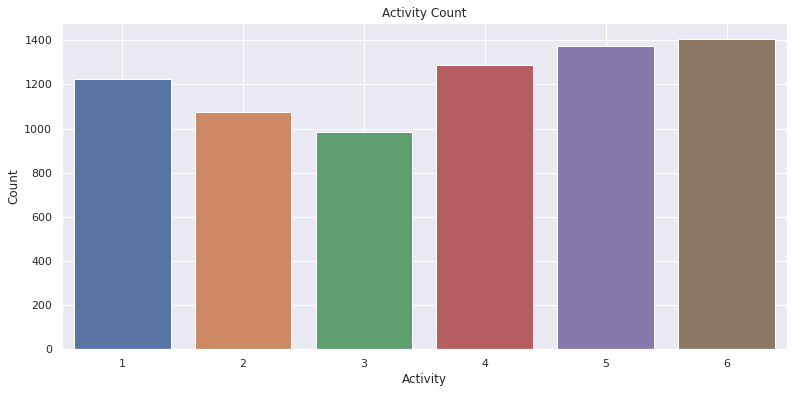

In [ ]:
sns.set(rc={'figure.figsize':(13,6)})
fig = sns.countplot(x = "Activity" , data = df)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Activity Count")
plt.grid(True)
plt.show(fig)


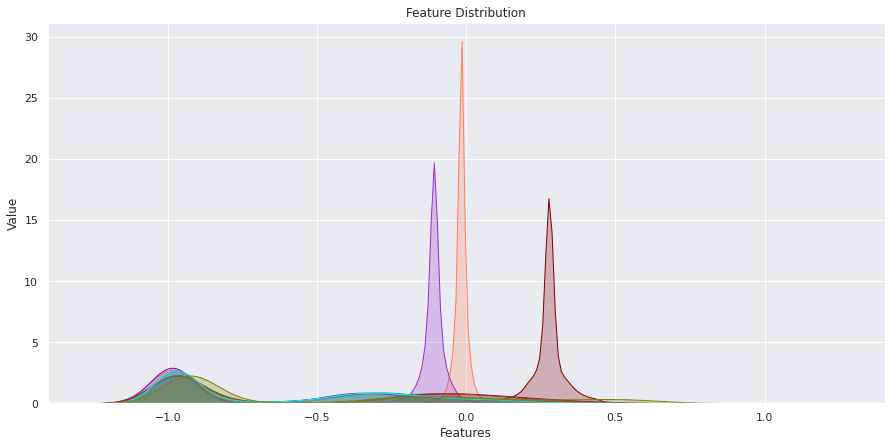

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in df.columns[0:10]:
    index = index + 1
    
    fig = sns.kdeplot(df[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

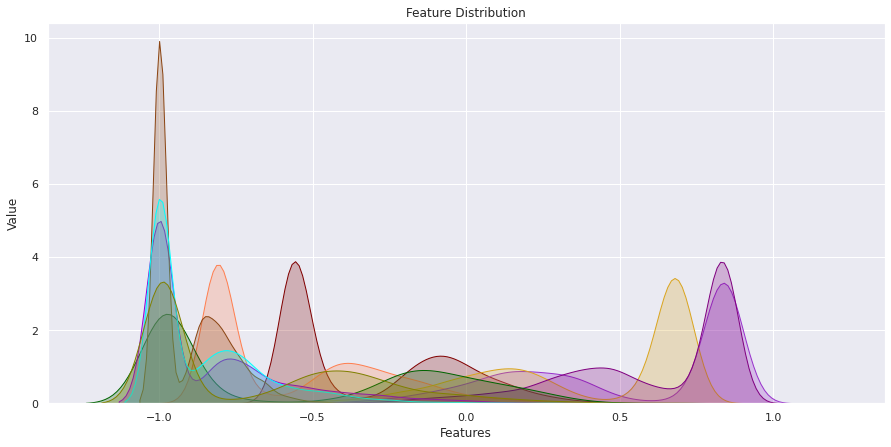

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in df.columns[10:20]:
    index = index + 1
    ax1 = sns.kdeplot(df[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

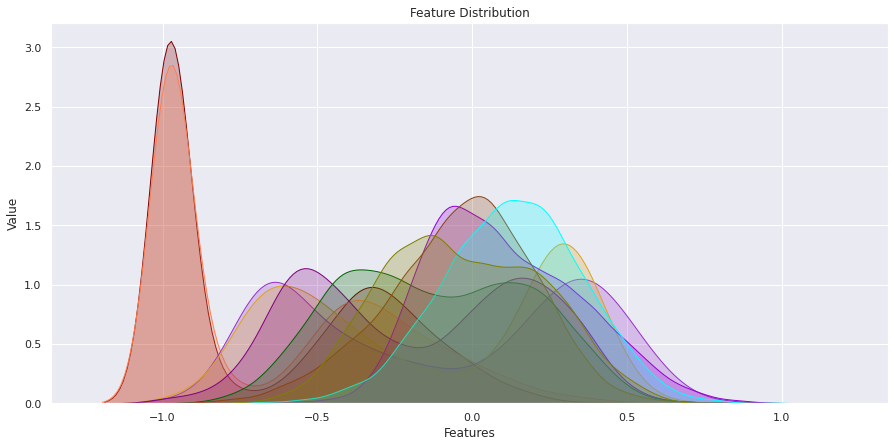

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in df.columns[20:30]:
    index = index + 1
    ax1 = sns.kdeplot(df[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

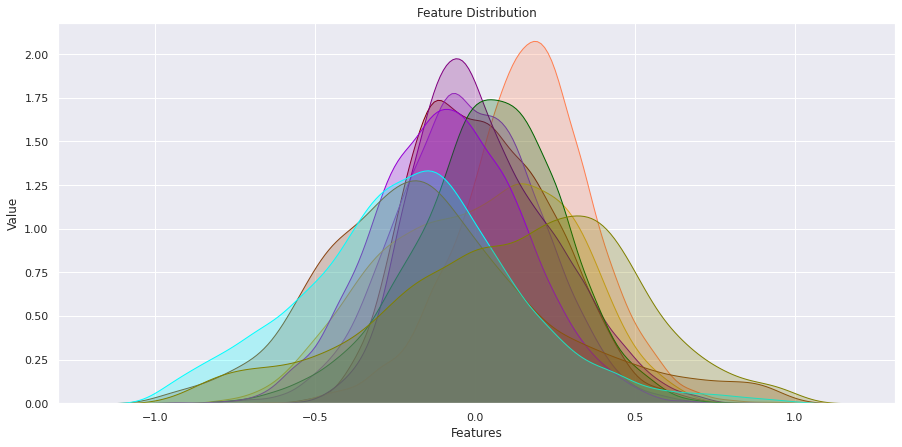

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in df.columns[30:40]:
    index = index + 1
    ax1 = sns.kdeplot(df[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

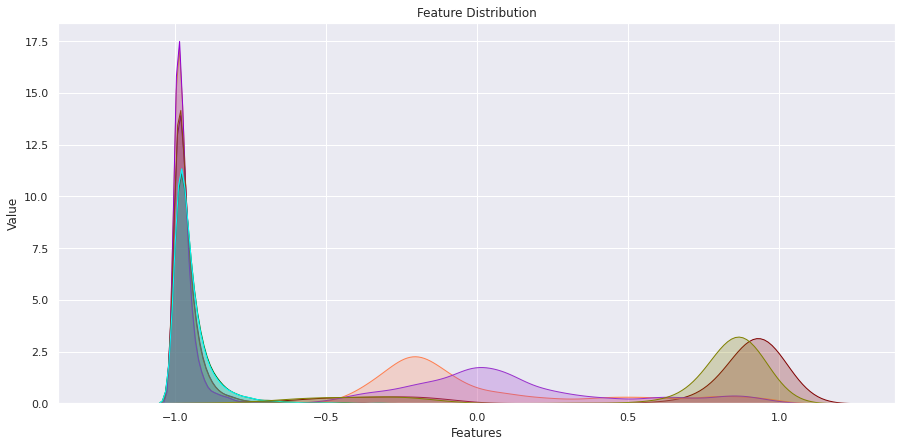

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in df.columns[40:50]:
    index = index + 1
    ax1 = sns.kdeplot(df[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

In [ ]:

scaler = MinMaxScaler()
scaler.fit(df.iloc[:,0:562].astype(float))
mat_train = scaler.transform(df.iloc[:,0:562].astype(float))
print(mat_train)

[[0.64429225 0.48985291 0.43354743 ... 0.79825103 0.47068654 0.        ]
 [0.63920942 0.49179472 0.4382399  ... 0.79848665 0.47284164 0.        ]
 [0.63982653 0.49026642 0.44326915 ... 0.79872236 0.47544109 0.        ]
 ...
 [0.63669369 0.49149469 0.47748909 ... 0.84506893 0.52040559 1.        ]
 [0.64482708 0.49057848 0.42085971 ... 0.84323381 0.51266974 1.        ]
 [0.67575173 0.49378844 0.39806642 ... 0.84348837 0.51834742 1.        ]]


In [ ]:
scaler = MinMaxScaler()
scaler.fit(test.iloc[:,0:562].astype(float))
mat_test = scaler.transform(test.iloc[:,0:562].astype(float))
print(mat_test)

[[0.6718788  0.55764282 0.52464834 ... 0.62209457 0.46362736 0.        ]
 [0.69470427 0.57426358 0.42707858 ... 0.62446791 0.45014396 0.        ]
 [0.68636345 0.55310221 0.42794829 ... 0.62380956 0.45251181 0.        ]
 ...
 [0.74529355 0.64526771 0.43015674 ... 0.62088108 0.58803909 1.        ]
 [0.65638384 0.62620241 0.44817885 ... 0.61581385 0.59135763 1.        ]
 [0.58994885 0.56560474 0.41032069 ... 0.61537208 0.59163879 1.        ]]


In [ ]:

temp = []
for i in df.Activity:
    if i == 1: temp.append(0) # "WALKING"
    if i == 2: temp.append(1) # "WALKING_UPSTAIRS"
    if i == 3: temp.append(2) # "WALKING_DOWNSTAIRS"
    if i == 4: temp.append(3) # "SITTING"
    if i == 5: temp.append(4) # "STANDING"
    if i == 6: temp.append(5) # "LAYING"
df["n_Activity"] = temp

In [ ]:
temp = []
for i in test.Activity:
    if i == 1: temp.append(0)
    if i == 2: temp.append(1)
    if i == 3: temp.append(2)
    if i == 4: temp.append(3)
    if i == 5: temp.append(4)
    if i == 6: temp.append(5)
test["n_Activity"] = temp

In [ ]:
df.drop(["Activity"] , axis = 1 , inplace = True)
test.drop(["Activity"] , axis = 1 , inplace = True)

In [ ]:

y_train = to_categorical(df.n_Activity , num_classes=6)
y_test = to_categorical(test.n_Activity , num_classes=6)

In [ ]:
X_train = mat_train 
X_test = mat_test

In [ ]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(7352, 562) (7352, 6)
(2947, 562) (2947, 6)


In [ ]:
df.iloc[:,0:562].count()


tBodyAcc-mean()-X                       7352
tBodyAcc-mean()-Y                       7352
tBodyAcc-mean()-Z                       7352
tBodyAcc-std()-X                        7352
tBodyAcc-std()-Y                        7352
                                        ... 
angle(tBodyGyroJerkMean,gravityMean)    7352
angle(X,gravityMean)                    7352
angle(Y,gravityMean)                    7352
angle(Z,gravityMean)                    7352
subject                                 7352
Length: 562, dtype: int64

In [ ]:

filepath="/content/drive/MyDrive/UCI HAR Dataset/HARANN-master/HAR_weights.hdf5"

lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=1, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1] , activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer = Adam(learning_rate = 0.0005),loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 64)                36032     
_________________________________________________________________
dense_29 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dense_30 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_31 (Dense)             (None, 196)               25284     
_________________________________________________________________
dense_32 (Dense)             (None, 64)                12608     
_________________________________________________________________
dense_33 (Dense)             (None, 32)               

In [ ]:
history = model.fit(X_train, y_train , epochs=30 , batch_size = 256 , validation_data=(X_test, y_test) , callbacks=[checkpoint,lr_reduce])


Epoch 1/30
29/29 [==============================] - 1s 15ms/step - loss: 1.1942 - accuracy: 0.5233 - val_loss: 1.3929 - val_accuracy: 0.3590
Epoch 2/30
29/29 [==============================] - 0s 8ms/step - loss: 0.4278 - accuracy: 0.8634 - val_loss: 0.9765 - val_accuracy: 0.6390
Epoch 3/30
29/29 [==============================] - 0s 8ms/step - loss: 0.1696 - accuracy: 0.9378 - val_loss: 0.7025 - val_accuracy: 0.7360
Epoch 4/30
29/29 [==============================] - 0s 8ms/step - loss: 0.1138 - accuracy: 0.9576 - val_loss: 0.6576 - val_accuracy: 0.7343
Epoch 5/30
29/29 [==============================] - 0s 9ms/step - loss: 0.0770 - accuracy: 0.9731 - val_loss: 0.4606 - val_accuracy: 0.8588
Epoch 6/30
29/29 [==============================] - 0s 9ms/step - loss: 0.0609 - accuracy: 0.9771 - val_loss: 0.4342 - val_accuracy: 0.8405
Epoch 7/30
29/29 [==============================] - 0s 10ms/step - loss: 0.0618 - accuracy: 0.9759 - val_loss: 0.4672 - val_accuracy: 0.7872
Epoch 8/30
29/29 [

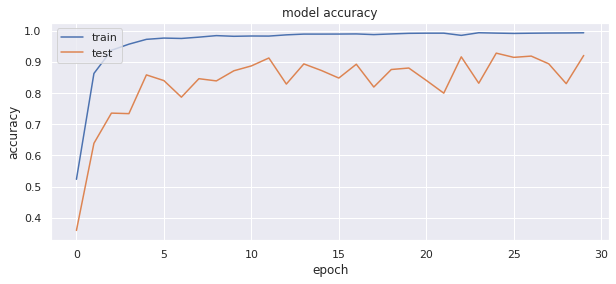

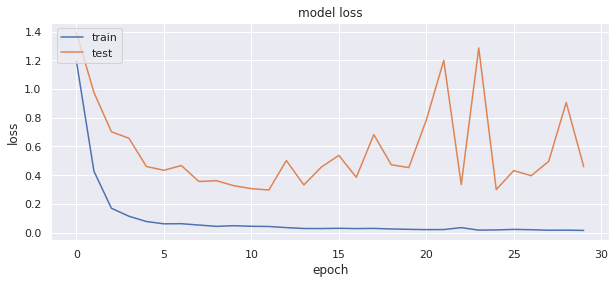

In [ ]:
rcParams['figure.figsize'] = 10, 4
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.load_weights("/content/drive/MyDrive/UCI HAR Dataset/HARANN-master/HAR_weights.hdf5")
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

In [ ]:
print(classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       496
           1       0.97      0.85      0.90       471
           2       0.74      1.00      0.85       420
           3       0.48      0.99      0.65       491
           4       0.00      0.00      0.00       532
           5       1.00      1.00      1.00       537

    accuracy                           0.76      2947
   macro avg       0.69      0.77      0.71      2947
weighted avg       0.68      0.76      0.70      2947



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


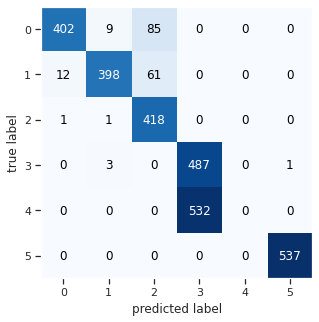

In [ ]:
CM = confusion_matrix(y_true, pred)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(10, 5))
plt.show()

In [ ]:
#0 "WALKING"
#1 "WALKING_UPSTAIRS"
#2 "WALKING_DOWNSTAIRS"
#3 "SITTING"
#4 "STANDING"
#5 "LAYING"